[**Challenge n**](#Challenge-n)

# Challenge n

Given $x \in [0, 1]$, calculate the following functions:

\begin{align}
    f(x) &= \sqrt{\left|x\right|} + \sqrt{1-x^{2}} \\
    h(x) &= \sqrt{\left|x\right|} - \sqrt{1-x^{2}}
\end{align}

What does the function look like? Google (google **numpy** and **matplotlib.pyplot**).

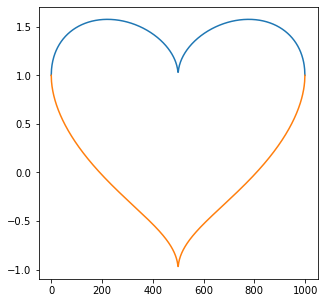

In [16]:
# upper function
f = lambda x: abs(x)**(1/2) + (1-x**2)**(1/2)

# lower function
h = lambda x: abs(x)**(1/2) - (1-x**2)**(1/2)

import matplotlib.pyplot as plt
import numpy as np

# linear vector
x = np.linspace(-1, 1, 1000)

# calc upper part
u = f(x)

# calc lower part
d = h(x)

# plot
plt.figure(figsize=(5, 5)) # set figure size

plt.plot(u)
plt.plot(d)
plt.show()

**(Warm-up)**

Approximate Euler's number $e$.

A few identities:
\begin{align}
    e^x &= \lim_{m \to \infty} \left(1+\frac{x}{m} \right)^m \\
    &= \sum_{n=0}^{\infty}\frac{x^n}{n!} = 1 + x + {x^2 \over 2} + {x^3 \over 2 \cdot 3} + {x^4 \over 2 \cdot 3 \cdot 4} + ...
\end{align}

In [17]:
%%time

m = 1e10
e = (1 + 1/m)**m
print('e ~=', e)

e ~= 2.7182820532347876
Wall time: 0 ns


In [18]:
%%time
# using Taylor approximation
n = 10_000

e = 0
fac = 1

for i in range(n):
    
    e += 1/fac
    
    fac *= (i+1)
    
    
print(f'e ~= {e:,}')

e ~= 2.7182818284590455
Wall time: 27 ms


**(Challenge)**

Create a function called **`ln(x, d=10)`** that takes an numeric argument **`x`** and default integer argument **`d=10`.** The function should return an approximation of $\ln(x) = \log_e(x)$ accurate to `d` decimals.

Taylor expansion of $\ln(x)$ around $a$:
$$\begin{align}
    \ln(x) &= \ln(a) + \sum_{n=1}^{\infty} \frac{(-1)^{n-1} a^{-n}(x-a)^n}{n!} \\
    &= \ln(a) + a^{-1}(x-a) - \frac{a^{-2}(x-a)^2}{2} + \frac{a^{-3}(x-a)^3}{2 \cdot 3} + ...
\end{align}$$

In [19]:
%%time

x = 3

# approximate around a = 1
res = 0
factorial = 1

for n in range(1, 100_000):
    
    factorial *= n
    
    res += (-1)**(n-1) * (x-1)**n / factorial
    
print(res)

0.8646647167633875
Wall time: 15.6 s


**(Warm-up)**

Python has a in-built function called `sum()` which can take a list or tuple and sum all the values. Create a function called **`prod()`** which takes a list or tuple of numbers and returns their product.

In [20]:
def prod(iterable):
    '''
    Return product of elements in the iterable.
    '''
    # seed with multiplicative identity
    res = 1
    
    # iterate through iterable
    for x in iterable:
        res *= x
        
    # return product
    return res

print(prod([1, 2, 3]))

ten_factorial = prod([i for i in range(1, 10)])
print(ten_factorial)

6
362880


# Challenge n

**(Warm-up)**

Consider a triangle where each layer is constructed with numbers from 0 to 9:

```
0
11
222
3333
 ⋮
9999999999
00000000000
111111111111
```

Print such a triangle with 20 layers.

**(Challenge)**

Wiki: https://en.wikipedia.org/wiki/Pascal%27s_triangle

Pascal's Triangle is a pyramid of numbers constructed as follows:
```
      1
     1 1
    1 2 1
   1 3 3 1
  1 4 6 4 1
      ⋮
```
Where the numbers in each level is constructed by the sum of the numbers standing on its shoulders from the level above.

For example, the 5th row of the triangle `1 4 6 4 1` is constructed as follows:
```
              1
           1     1
        1     2     1
     1     3     3     1
(0+1) (1+3) (3+3) (3+1) (1+0) => 1 4 6 4 1
```
Create a list of lists that contain the first **`20 rows`** of Pascal's Triangle.

**i.e.:**
```python
pascal == [[1],
           [1, 1],
           [1, 2, 1],
           [1, 3, 3, 1],
           [1, 4, 6, 4, 1],
              ⋮
          ]
```

In [21]:
# solution 1: using indexing

pascal = [[1]]

while len(pascal) < 20:

    prev = pascal[-1]
    
    # add 0 + first
    row = [prev[0]]
    
    # add left and right from interior numbers
    for L, R in zip(prev[:-1], prev[1:]):
        row.append(L+R)
        
    # add last + 0
    row.append(prev[-1])
    
    pascal.append(row)

# function to print
def pprint(list_of_list):
    rep = str(list_of_list).replace('],', '],\n')
    print(rep)
    
pprint(pascal)

[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1],
 [1, 8, 28, 56, 70, 56, 28, 8, 1],
 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1],
 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1],
 [1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1],
 [1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1],
 [1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1],
 [1, 14, 91, 364, 1001, 2002, 3003, 3432, 3003, 2002, 1001, 364, 91, 14, 1],
 [1, 15, 105, 455, 1365, 3003, 5005, 6435, 6435, 5005, 3003, 1365, 455, 105, 15, 1],
 [1, 16, 120, 560, 1820, 4368, 8008, 11440, 12870, 11440, 8008, 4368, 1820, 560, 120, 16, 1],
 [1, 17, 136, 680, 2380, 6188, 12376, 19448, 24310, 24310, 19448, 12376, 6188, 2380, 680, 136, 17, 1],
 [1, 18, 153, 816, 3060, 8568, 18564, 31824, 43758, 48620, 43758, 31824, 18564, 8568, 3060, 816, 153, 18, 1],
 [1, 19, 171, 969, 3876, 11628, 27132, 50388, 75582, 92378, 92378, 75582, 50388,

In [22]:
# solution 2: using binomial theorem - https://en.wikipedia.org/wiki/Binomial_theorem

# fast factorial with memoization
_fac = [1]
def factorial(n):
    '''
    Compute factorial using memoization
    '''
    # while factorials not computed
    while n >= (m:=len(_fac)):
        _fac.append(m * _fac[-1])
        
    return _fac[n]

# binomial coefficient: https://en.wikipedia.org/wiki/Binomial_coefficient
def binom_coeff(n, k):
    '''
    Compute n choose k
    '''
    return int(factorial(n) / (factorial(n-k) * factorial(k)))

# create pascal
pascal = []
for n in range(20):
    
    row = []
    for k in range(n+1):
        # add binomial coefficients
        row.append(binom_coeff(n, k))
        
    pascal.append(row)
    
print(str(pascal).replace('],', '],\n'))

[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1],
 [1, 8, 28, 56, 70, 56, 28, 8, 1],
 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1],
 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1],
 [1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1],
 [1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1],
 [1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1],
 [1, 14, 91, 364, 1001, 2002, 3003, 3432, 3003, 2002, 1001, 364, 91, 14, 1],
 [1, 15, 105, 455, 1365, 3003, 5005, 6435, 6435, 5005, 3003, 1365, 455, 105, 15, 1],
 [1, 16, 120, 560, 1820, 4368, 8008, 11440, 12870, 11440, 8008, 4368, 1820, 560, 120, 16, 1],
 [1, 17, 136, 680, 2380, 6188, 12376, 19448, 24310, 24310, 19448, 12376, 6188, 2380, 680, 136, 17, 1],
 [1, 18, 153, 816, 3060, 8568, 18564, 31824, 43758, 48620, 43758, 31824, 18564, 8568, 3060, 816, 153, 18, 1],
 [1, 19, 171, 969, 3876, 11628, 27132, 50388, 75582, 92378, 92378, 75582, 50388,

# Challenge n + 1
Rapping, rapping at my chamber door 🦉

**(Challenge)**

An acrostic poem is one where certain letters in each line forms a secret message. "A Valentine" by Edgar Allen Poe has a secret message formed by the 1st letter of the 1st line, the 2nd letter of the 2nd line, ..., n-th letter of n-th line.

Can you figure out who this poem is about?


In [23]:
# "A Valentine", a hidden acrostic by Edgar Allen Poe
# message key is the nth letter of the nth line
poem = """
For her this rhyme is penned, whose luminous eyes,
Brightly expressive as the twins of Loeda,
Shall find her own sweet name, that, nestling lies
Upon the page, enwrapped from every reader.
Search narrowly the lines!--they hold a treasure
Divine--a talisman--an amulet
That must be worn at heart. Search well the measure--
The words--the syllables! Do not forget
The trivialest point, or you may lose your labor!
And yet there is in this no Gordian knot
Which one might not undo without a sabre,
If one could merely comprehend the plot.
Enwritten upon the leaf where now are peering
Eyes scintillating soul, there lie perdus
Three eloquent words oft uttered in the hearing
Of poets, by poets--as the name is a poet’s, too.
Its letters, although naturally lying
Like the knight Pinto--Mendez Ferdinando--
Still form a synonym for Truth--Cease trying!
You will not read the riddle, though you do the best you can do.
"""

In [24]:
# challenge

# split lines
lines = poem.split('\n')

# remove empty beginning and ending lines
lines = lines[1:-1]

# initiate message
msg = ''

# for n-th line
for n, line in enumerate(lines):
    
    # filter alphabetical characters
    chars = [s for s in line if s.isalpha()]
    
    # add n-th character to message
    msg += chars[n]
    
print(msg)

Francessargentosgood


# Challenge n + 2

Autobots, roll out! 🤖

**(Warm-Up)**

<!-- \subsubsection*{(Warm-Up)} -->

Consider the equation:
\begin{align}
f(x) = \sqrt{1 - x^2}.
\end{align}

Compute the following summation:
\begin{align}
\sigma = \sum_{n=1}^{N}  f\left({n \over N}\right) {1 \over N}
\end{align}

for $N = 1000$. What is $4\sigma?$ What is $4\sigma$ if $N = 100,000?$

What's being computed here? Is there a way to achieve the goal more "effectively?"


In [25]:
# warm-up

# define n
N = 100_000

# define function
f = lambda x: (1-x**2)**(1/2)
dx = 1/N

# approximate integral
sigma = sum(f(n * dx) * dx for n in range(N))

# approximate pi
pi = 4*sigma

print(pi)

3.1416126164019564


**(Challenge)**

A *`prime number`** is a natural number greater than 1 whose only divisor is 1 and itself. Create a set or list of all primes less than or equal to any positive integer **`n`**.

How many primes are there **between 100 and 1,000**? How many **between 100,000 and 1,000,000**?

In [26]:
%%time
# challenge: brute-force method

primes = {2}

N = 1_000
for n in range(2, N+1):
    
    # if it's not divsible by any prime so far
    if not any(n % p == 0 for p in primes):
        
        # it's a prime
        primes.add(n)
        
# print(sorted(primes))

Wall time: 1.99 ms


In [27]:
%%time
# Sieve of Eratosthenes: uses memory to reduce computation

primes, nonprimes = set(), set()

N = 1_000_000

for n in range(2, N+1):
    
    # if n is not in the set of non-primes
    if n not in nonprimes:
        
        # it's a prime
        primes.add(n)
        
        # add all multiples to non-primes
        for m in range(n*2, N+1, n):
            nonprimes.add(m)
            
# print(sorted(primes))

Wall time: 562 ms


In [28]:
%%time
# "Lazy" method for Sieve of Erostophanes
# https://www.youtube.com/watch?v=5jwV3zxXc8E

def natural(n):
    '''
    yields natural numbers (recursive)
    
    parameters
    ---
    n : int
        the first number for the set
    '''
    yield n
    
    yield from natural(n+1)
    
def eros_sieve(s):
    '''
    yields primes (recursive)
    
    parameters
    ---
    s : generator (infinite set) of natural numbers
    '''
    n = next(s)
    yield n
    yield from eros_sieve(i for i in s if i%n != 0)
    

# get result
N = 1_000

primes = set()
s = eros_sieve(natural(2))

p = next(s) # generate first prime

while p <= N:
    primes.add(p)
    p = next(s) # generate next prime

print(sorted(primes))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
Wall time: 45.4 ms


# Challenge n + 3

**(Warm-up)**

Create a list of numbers **`from 1 to 20`** in order where each number `n` is repeated `n` times.

**i.e.: `x = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, ....]`**.

Bonus points for using a list comprehension.

In [29]:
# warm-up
n = 20

x = [i for i in range(n+1) for _ in range(i)]

print(x)

[1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


**(Challenge)**
    
A look-and-say number sequence is generated mnemonically. If we start with the number **`1`** in the sequence:

**`1`** reads `One "one"` => **`11`**, which are now the next numbers in the sequence.

**`11`** reads `Two "ones"` => **`21`**, 

**`21`** reads `One "two", one "one"` => **`1211`**,

**`1211`** reads `One "one", one "two", two "ones"` => **`111221`**,

**`111221`** reads `Three "ones", two "twos", one "one"` => **`312211`** ...

... and so on.

Create a `look-and-say` sequence as a list of **length 30** that begins with **1.**

**i.e.:**

```python
result == [1,
           11,
           21,
           1211,
           111221,
           312211,
             ⋮
          ]
```

John Conway's explanation of Look-and-Say Numbers: https://youtu.be/ea7lJkEhytA

# Challenge n + 4

**(Warm-up)**

Without any imports, create a function **`vec_mult()`** that takes two lists and returns their vector dot product.

```python
def vec_mult(vec1, vec2):
    # your code here
    return res

x = [1, 2, 3]
y = [4, 5, 6]

z = vec_mult(x, y)
print(z)
```

In [30]:
# warm-up

def vec_mult(vec1, vec2):
    
    res = sum(a * b for a, b in zip(vec1, vec2))
    
    return res

x = [1, 2, 3]
y = [4, 5, 6]

z = vec_mult(x, y)
print(z)

32


**(Challenge)**

Let a list of numbers represent a row vector. Let a list of row vectors represent a matrix. I've made a function `mprint` to print the matrix representation.

Without using imports:

1. Create a function called **`transpose()`** that takes a matrix and returns its transpose.

2. Create a function called **`mat_mult()`** that takes two matrices and returns their dot product.

Check your results with numpy.

```python
def transpose(X):
    # your code here
    return

def mat_mult(X, Y):
    # your code here  
    return

def mprint(M, *args, **kwargs):
    '''
    Quick print list M as matrix
    '''
    mat_rep = str(M).replace('],', '],\n')
    print(mat_rep, *args, **kwargs)
    
# test cases
X = [[1, 2],
     [3, 4],
     [5, 6]]

Y = transpose(X)
Z = mat_mult(X, Y)

mprint(X, '\n')
mprint(Y, '\n')
mprint(Z)
```

In [31]:
# challenge

def transpose(X):

    Y = [[0 for _ in X] for _ in X[0]]

    for i, xrow in enumerate(X):
        
        for j, v in enumerate(xrow):
        
            Y[j][i] = v

    return Y

def mat_mult(X, Y):
    
    # convert column vector to "row vector"
    YT = transpose(Y)
    
    Z = [[0 for _ in Y[0]] for _ in X]
    
    # for row vector in x
    for i, x in enumerate(X):
        
        # for column vector in Y (row vector in Y.T)
        for j, y in enumerate(YT):
            
            Z[i][j] = vec_mult(x, y)
            
    return Z

def mprint(M, *args, **kwargs):
    '''
    Quick print list M as matrix
    '''
    mat_rep = str(M).replace('],', '],\n')
    print(mat_rep, *args, **kwargs)

# test case
X = [[1, 2],
     [3, 4],
     [5, 6]]

Y = transpose(X)
Z = mat_mult(X, Y)

mprint(X, '\n')
mprint(Y, '\n')
mprint(Z)

[[1, 2],
 [3, 4],
 [5, 6]] 

[[1, 3, 5],
 [2, 4, 6]] 

[[5, 11, 17],
 [11, 25, 39],
 [17, 39, 61]]
